In [81]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
#criando o dataframe
covidCampinas_df = pd.read_csv("covid_CAMPINAS.csv", sep=",")
covidCampinas_df.head(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
0,ab97ebb2-d5a4-49bf-82e0-820cd766ee70-i0b0,2e51f02d12646146d052b6319f70baa6c09ba401c9a5e2...,19.0,2001-09-18,M,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,13025.0,B,2023180,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE ERNESTO SIERRA HUNOVITCH OROZI...,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,FE3591,PFIZER,NaN,2021-08-13,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-08-13T03:08:00.000Z,18262,1
1,a9cd0331-67a3-421b-b8c7-2743a975e9f6-i0b0,e59477534caa148b0c43cbc22f372857e0a9dcb7a8d321...,23.0,1997-11-04,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13052.0,B,2023598,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE PARQUE VALENCA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,FD7219,PFIZER,NaN,2021-08-17,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-08-17T03:08:00.000Z,18262,1
2,cab120c7-ef28-4c5a-a006-89aeb40d4d31-i0b0,a7f6affdca43ee817f42469ddef2e123b640a0c67a8c97...,36.0,1984-08-22,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13052.0,B,9294481,MUNICIPIO DE CAMPINAS,CENTRO DE SAUDE SAN DIEGO GERALDO ELIAS,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,FA9095,PFIZER,NaN,2021-07-17,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-07-17T03:00:00.000Z,18262,1
3,97a8a762-7ef4-48bb-a09e-bafa077dba0e-i0b0,806884be8ece402efd6622451c9a88afd09a9ea0f590b4...,28.0,1993-05-11,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13050.0,B,2022931,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE PEDRO DE AQUINO NETO,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,FD7221,PFIZER,NaN,2021-08-03,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-08-03T03:08:00.000Z,18262,1
4,5f701442-cc80-47d2-ba84-12f307c71b61-i0b0,82ac8ed67c3d31e398740c1130c423ff998d9b95830450...,63.0,1957-12-27,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13040.0,B,9635289,MUNICIPIO DE CAMPINAS,VIGILANCIA EM SAUDE NOROESTE,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,213VCD019W,ASTRAZENECA/FIOCRUZ,NaN,2021-05-02,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,VACIVIDA,2021-05-02T03:00:00.000Z,18262,1


In [83]:
covidCampinas_df.shape

(27625, 35)

In [141]:
#removendo linhas duplicadas, se existirem
covidCampinas_df = covidCampinas_df.drop_duplicates()
covidCampinas_df.shape

(27625, 35)

In [84]:
#garantindo que temos apenas dados de estabelecimentos de saúde de Campinas
covidCampinas_df['estabelecimento_municipio_nome'].unique()

array(['CAMPINAS'], dtype=object)

In [85]:
#equivalência entre descrição da dose e o seu código
print(covidCampinas_df['vacina_descricao_dose'].unique())
print(covidCampinas_df['vacina_numdose'].unique())

['1ª Dose' '2ª Dose' 'Reforço' 'Dose']
[ 1  2 38  8]


In [86]:
#entendendo as métricas das colunas com valores contínuos
covidCampinas_df.describe()

,paciente_idade,paciente_racacor_codigo,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_cep,estabelecimento_valor,estabelecimento_municipio_codigo,vacina_grupoatendimento_codigo,vacina_categoria_codigo,vacina_fabricante_referencia,vacina_codigo,id_sistema_origem,vacina_numdose
count,27624.000000,27624.000000,27548.000000,27548.0,26593.000000,2.762500e+04,27625.0,27625.000000,27625.000000,0.0,27625.000000,27625.0,27625.000000
mean,45.510245,24.990515,350052.163678,10.0,14749.109879,3.108859e+06,350950.0,303.905774,3.002679,NaN,85.921919,18262.0,3.603873
std,18.324139,41.542926,20643.215685,0.0,9524.735331,2.306822e+06,0.0,279.038613,2.808118,NaN,0.877127,0.0,7.919443
min,12.000000,1.000000,110002.000000,10.0,1017.000000,4.111910e+05,350950.0,102.000000,1.000000,NaN,85.000000,18262.0,1.000000
25%,31.000000,1.000000,350950.000000,10.0,13051.000000,2.022931e+06,350950.0,201.000000,2.000000,NaN,85.000000,18262.0,1.000000
50%,43.000000,2.000000,350950.000000,10.0,13059.000000,2.023466e+06,350950.0,201.000000,2.000000,NaN,86.000000,18262.0,2.000000
75%,59.000000,4.000000,350950.000000,10.0,13086.000000,2.079003e+06,350950.0,203.000000,2.000000,NaN,87.000000,18262.0,2.000000
max,121.000000,99.000000,999999.000000,10.0,99700.000000,9.725407e+06,350950.0,1901.000000,25.000000,NaN,88.000000,18262.0,38.000000


In [87]:
#colunas com dados nulos
covidCampinas_df.isna().sum()

document_id                                     0
paciente_id                                     1
paciente_idade                                  1
paciente_datanascimento                         1
paciente_enumsexobiologico                      1
paciente_racacor_codigo                         1
paciente_racacor_valor                          1
paciente_endereco_coibgemunicipio              77
paciente_endereco_copais                       77
paciente_endereco_nmmunicipio                  77
paciente_endereco_nmpais                       77
paciente_endereco_uf                           77
paciente_endereco_cep                        1032
paciente_nacionalidade_enumnacionalidade        5
estabelecimento_valor                           0
estabelecimento_razaosocial                     0
estalecimento_nofantasia                        0
estabelecimento_municipio_codigo                0
estabelecimento_municipio_nome                  0
estabelecimento_uf                              0


In [88]:
#agrupando pelas doses
groupDoses = covidCampinas_df.groupby(['vacina_descricao_dose', 'paciente_enumsexobiologico']).size().reset_index(name='count_rows')
groupDoses

,vacina_descricao_dose,paciente_enumsexobiologico,count_rows
0,1ª Dose,F,5856
1,1ª Dose,M,4916
2,2ª Dose,F,7878
3,2ª Dose,M,6564
4,Dose,F,483
5,Dose,M,573
6,Reforço,F,877
7,Reforço,M,477


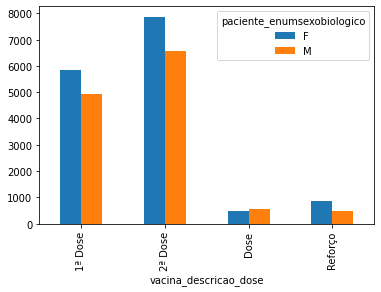

In [89]:
groupDoses.pivot("vacina_descricao_dose", "paciente_enumsexobiologico", "count_rows").plot(kind='bar')

plt.show()

In [90]:
#valores únicos dos endereços dos pacientes vacinados
covidCampinas_df['paciente_endereco_nmmunicipio'].unique()

array(['CAMPINAS', 'REGINOPOLIS', 'AMERICANA', 'ITABORAI', 'FORMOSA',
       'TERESINA', 'SAO JOSE DO RIO PRETO', 'SACRAMENTO', 'ANDRADAS',
       'HORTOLANDIA', 'ITAIPULANDIA', 'MANAUS', 'ATIBAIA', 'RIO CLARO',
       'SAO PAULO', 'MESSIAS', 'GUARULHOS', 'SUMARE', 'FORTALEZA', nan,
       'ITU', 'JUNDIAI', 'MOJI MIRIM', 'IGARACU DO TIETE', 'PROMISSAO',
       'MOCOCA', 'JAMBEIRO', 'FLORIANOPOLIS', 'VINHEDO', 'RECIFE',
       'COSMOPOLIS', 'BELO HORIZONTE', 'RIO QUENTE', 'JAU', 'JAGUARIUNA',
       'ANTONIO GONCALVES', 'MONTE MOR', 'OLIMPIA', 'VALINHOS',
       'VARGINHA', 'BAURU', 'CAMPOS GERAIS', 'CAPIVARI', 'DOURADOS',
       'NOVA OLINDA', 'MOGI GUACU', 'VICOSA DO CEARA', 'PIRASSUNUNGA',
       'ITAPIRA', 'SALTO', 'TIMBAUBA', 'SETE LAGOAS', 'LONDRINA',
       'PAULINIA', 'MEDINA', 'JARAGUA DO SUL', 'PAICANDU', 'INDAIATUBA',
       'VARGEM GRANDE DO SUL', 'TEOFILO OTONI',
       'ESPIRITO SANTO DO PINHAL', 'IRACEMAPOLIS', 'RIBEIRAO PRETO',
       'CASSILANDIA', 'PINHEIROS', 'ITATIBA

In [91]:
#analisando o endereço dos pacientes
groupEndPaciente = covidCampinas_df.groupby(['paciente_endereco_nmmunicipio']).size().reset_index(name='count_rows')
groupEndPaciente.sort_values('count_rows', ascending=False)

,paciente_endereco_nmmunicipio,count_rows
147,CAMPINAS,23756
757,SAO PAULO,304
321,HORTOLANDIA,304
784,SUMARE,226
843,VALINHOS,184
...,...,...
357,IPUIUNA,1
359,IRAPURU,1
360,ITABERABA,1
362,ITABIRA,1


In [92]:
#analisando o nome fantasia dos estabelecimentos em Campinas
groupEstabNome = covidCampinas_df.groupby(['estalecimento_nofantasia']).size().reset_index(name='count_rows')
groupEstabNome.sort_values('count_rows', ascending=False)

,estalecimento_nofantasia,count_rows
97,VIGILANCIA EM SAUDE LESTE,1623
77,DISTRITO SANITARIO NORTE,1441
78,DISTRITO SANITARIO SUDOESTE,1343
99,VIGILANCIA EM SAUDE SUL,1275
98,VIGILANCIA EM SAUDE NOROESTE,1264
...,...,...
92,PENITENCIARIA DO SAO BERNARDO DE CAMPINAS,3
2,CAMPIMED,2
87,HOSPITAL SANTA SOFIA,1
11,CENTRO DE SAUDE CAMPINA GRANDE,1


In [93]:
#valores únicos dos grupos de atendimento
covidCampinas_df['vacina_grupoatendimento_nome'].unique()

array(['Pessoas de 18 a 64 anos',
       'Doenças Cardiovasculares e Cerebrovasculares',
       'Pessoas de 70 a 74 anos', 'Pessoas de 75 a 79 anos',
       'Pessoas de 80 anos ou mais', 'Pessoas de 65 a 69 anos', 'Outros',
       'Hipertensão de difícil controle ou com complicações/lesão de órgão alvo',
       'Gestante', 'Diabetes Mellitus', 'Ensino Básico',
       'Outros Imunocomprometidos', 'Segurança',
       'Pessoas com Deficiência Permanente', 'Obesidade Grave (Imc≥40)',
       'Neoplasias', 'Pessoas de 60 nos ou mais Institucionalizadas',
       'Aéreo', 'Coletivo Rodoviário Passageiros Urbano e de Longo Curso',
       'Pneumopatias Crônicas Graves', 'Doença neurológica crônica',
       'Doença Renal Crônica',
       'Pessoas com Deficiência Institucionalizadas', 'Puérpera',
       'Indivíduos Transplantados de Órgão Sólido', 'Síndrome de Down',
       'Povos indígenas em terras indígenas',
       'Pessoas em Situação de Rua', 'Quilombola'], dtype=object)

In [94]:
#valores únicos dos fabricantes das vacinas 
covidCampinas_df['vacina_fabricante_nome'].unique()

array(['PFIZER', 'ASTRAZENECA/FIOCRUZ', 'SINOVAC/BUTANTAN', 'JANSSEN'],
      dtype=object)

In [95]:
#agrupando pelos fabricantes das vacinas 
groupVacTipo = covidCampinas_df.groupby(['vacina_descricao_dose', 'vacina_fabricante_nome']).size().reset_index(name='count_rows')
groupVacTipo

,vacina_descricao_dose,vacina_fabricante_nome,count_rows
0,1ª Dose,ASTRAZENECA/FIOCRUZ,4354
1,1ª Dose,PFIZER,2716
2,1ª Dose,SINOVAC/BUTANTAN,3703
3,2ª Dose,ASTRAZENECA/FIOCRUZ,6377
4,2ª Dose,PFIZER,2710
5,2ª Dose,SINOVAC/BUTANTAN,5355
6,Dose,JANSSEN,1056
7,Reforço,ASTRAZENECA/FIOCRUZ,2
8,Reforço,PFIZER,1038
9,Reforço,SINOVAC/BUTANTAN,314


In [96]:
groupVacTipo2 = groupVacTipo.drop([6])
groupVacTipo2

,vacina_descricao_dose,vacina_fabricante_nome,count_rows
0,1ª Dose,ASTRAZENECA/FIOCRUZ,4354
1,1ª Dose,PFIZER,2716
2,1ª Dose,SINOVAC/BUTANTAN,3703
3,2ª Dose,ASTRAZENECA/FIOCRUZ,6377
4,2ª Dose,PFIZER,2710
5,2ª Dose,SINOVAC/BUTANTAN,5355
7,Reforço,ASTRAZENECA/FIOCRUZ,2
8,Reforço,PFIZER,1038
9,Reforço,SINOVAC/BUTANTAN,314


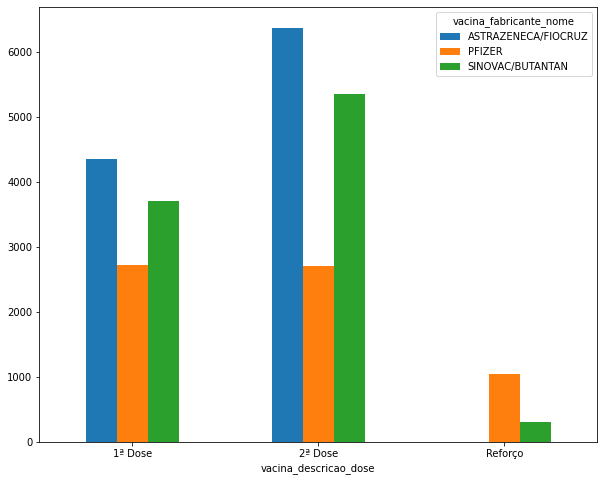

In [97]:
#comparando as doses com os fabricantes das vacinas
groupVacTipo2.pivot("vacina_descricao_dose", "vacina_fabricante_nome", "count_rows").plot(kind='bar', figsize=(10, 8), rot=0)

plt.show()

In [98]:
#agrupando pelos fabricantes das vacinas - 2 
groupVacTipo2 = covidCampinas_df.groupby(['vacina_fabricante_nome']).size().reset_index(name='count_rows')
groupVacTipo2

,vacina_fabricante_nome,count_rows
0,ASTRAZENECA/FIOCRUZ,10733
1,JANSSEN,1056
2,PFIZER,6464
3,SINOVAC/BUTANTAN,9372


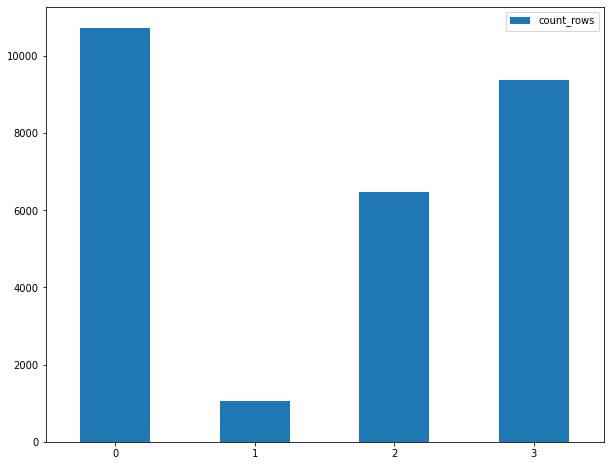

In [99]:
#plotando o fabricante da vacina vs quantidade utilizada
ax = groupVacTipo2.plot.bar(figsize=(10, 8), rot=0);

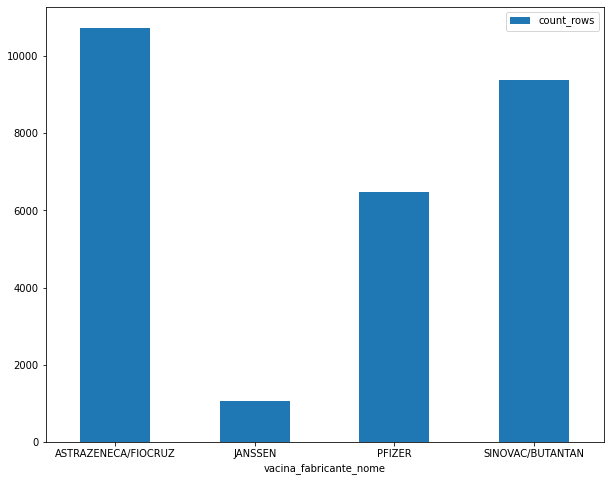

In [100]:
#mudando o index do gráfico
groupVacTipo2.set_index('vacina_fabricante_nome').plot(kind='bar', figsize=(10, 8), rot=0);

In [101]:
#agrupando pelos grupos de atendimento
groupVacTipo = covidCampinas_df.groupby(['vacina_grupoatendimento_nome']).size().reset_index(name='count_rows')
groupVacTipo

,vacina_grupoatendimento_nome,count_rows
0,Aéreo,219
1,Coletivo Rodoviário Passageiros Urbano e de Lo...,69
2,Diabetes Mellitus,716
3,Doença Renal Crônica,31
4,Doença neurológica crônica,38
5,Doenças Cardiovasculares e Cerebrovasculares,204
6,Ensino Básico,571
7,Gestante,79
8,Hipertensão de difícil controle ou com complic...,1254
9,Indivíduos Transplantados de Órgão Sólido,22


In [102]:
#Entendendo melhor o grupo de pessoas que receberam a dose de reforço
doseReforco = covidCampinas_df.query('vacina_descricao_dose=="Reforço"')
doseReforco['vacina_descricao_dose'].unique()

array(['Reforço'], dtype=object)

In [103]:
doseReforco.head(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
10256,0bfa4fc1-d80a-44dc-a70f-66ab3a7bfef7-i0b0,47e44da5406084f49195c8841586f7eee3b2814ae61a55...,44.0,1977-01-15,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13042.0,B,2022672,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE JARDIM AURELIA,350950,CAMPINAS,SP,926,Outros,9,Trabalhadores de Saúde,FG3524,PFIZER,NaN,2021-10-08,Reforço,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-10-08T03:00:00.000Z,18262,38
10257,75eccb3e-90b6-4a34-af83-cd022ec8682a-i0b0,5fd5772c93101e671d9f7bb5ba6186b642f7803a85d5f2...,51.0,1970-02-16,F,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,13082.0,B,2079798,UNIVERSIDADE ESTADUAL DE CAMPINAS,HOSPITAL DAS CLINICAS DA UNICAMP DE CAMPINAS,350950,CAMPINAS,SP,926,Outros,9,Trabalhadores de Saúde,FG3530,PFIZER,NaN,2021-10-25,Reforço,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-10-25T03:00:00.000Z,18262,38
10258,e93cf6f7-5c63-44f4-8224-2526229a16fb-i0b0,eb886cc79f269e2a964a5507bc179d03b07d984aeebd12...,71.0,1950-10-26,M,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13087.0,B,2023199,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE COSTA E SILVA,350950,CAMPINAS,SP,203,Pessoas de 70 a 74 anos,2,Faixa Etária,FG3533,PFIZER,NaN,2021-11-03,Reforço,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-11-03T03:00:00.000Z,18262,38
10259,c65d18be-a74f-4857-911a-0e48b76cd015-i0b0,6066f29e1f89a6b86ae27ad6bfc90d0ab8f71127591875...,37.0,1984-06-09,F,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,NaN,B,2078465,REAL SOCIEDADE PORTUGUESA DE BENEFICENCIA,REAL SOCIEDADE PORTUGUESA DE BENEFICENCIA,350950,CAMPINAS,SP,926,Outros,9,Trabalhadores de Saúde,FG3530,PFIZER,NaN,2021-10-06,Reforço,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-10-06T03:00:00.000Z,18262,38
10262,20ec19eb-a963-4884-8c96-d1ec62bc0fa9-i0b0,9781c6198e88503aabdd5f8451fa8df78daf26ec39a143...,44.0,1976-10-26,M,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13015.0,B,2081490,REDE MUNICIPAL DR MARIO GATTI DE URGENCIA EMER...,HOSPITAL MUNICIPAL DR MARIO GATTI CAMPINAS,350950,CAMPINAS,SP,926,Outros,9,Trabalhadores de Saúde,FG3530,PFIZER,NaN,2021-10-08,Reforço,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-10-08T03:00:00.000Z,18262,38


In [104]:
doseReforco.shape

(1354, 35)

In [105]:
#verificando os grupos que receberam a dose de reforço
doseReforco['vacina_grupoatendimento_nome'].unique()

array(['Outros', 'Pessoas de 70 a 74 anos', 'Pessoas de 80 anos ou mais',
       'Pessoas de 75 a 79 anos', 'Pessoas de 65 a 69 anos',
       'Pessoas de 60 nos ou mais Institucionalizadas',
       'Pessoas de 18 a 64 anos', 'Ensino Básico',
       'Outros Imunocomprometidos'], dtype=object)

In [106]:
#varificando o nome das categorias da vacina para o grupo que recebeu a dose de reforço
doseReforco['vacina_categoria_nome'].unique()

array(['Trabalhadores de Saúde', 'Faixa Etária',
       'Pessoas de 60 anos ou mais institucionalizadas',
       'Trabalhadores da Educação', 'Comorbidades'], dtype=object)

In [107]:
#Agrupando o dataframe com apenas dados da dose de reforço
group_doseReforco_grupo = doseReforco.groupby(['vacina_grupoatendimento_nome']).size().reset_index(name="count_rows")
group_doseReforco_grupo

,vacina_grupoatendimento_nome,count_rows
0,Ensino Básico,2
1,Outros,511
2,Outros Imunocomprometidos,3
3,Pessoas de 18 a 64 anos,13
4,Pessoas de 60 nos ou mais Institucionalizadas,21
5,Pessoas de 65 a 69 anos,74
6,Pessoas de 70 a 74 anos,349
7,Pessoas de 75 a 79 anos,222
8,Pessoas de 80 anos ou mais,159


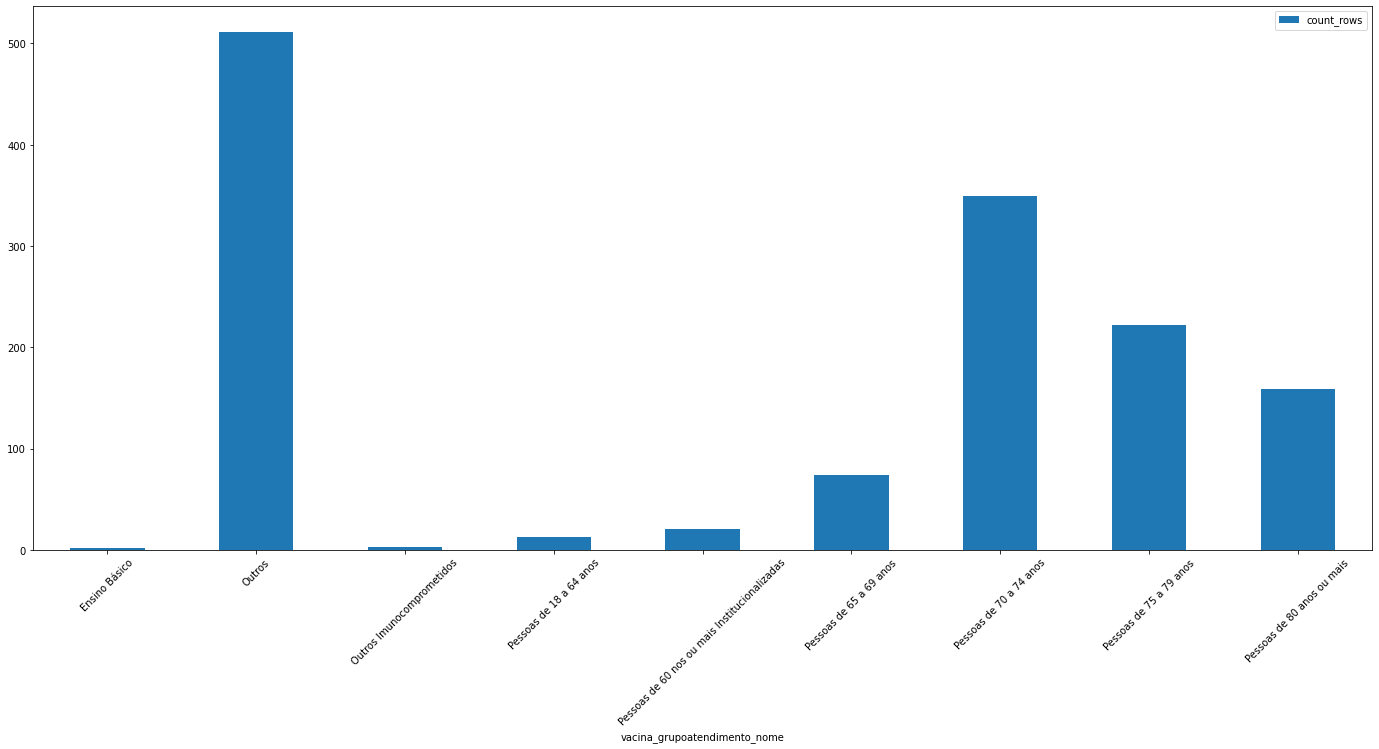

In [108]:
#plotando o grupo que recebeu a dose reforço
group_doseReforco_grupo.set_index('vacina_grupoatendimento_nome').plot(kind='bar', figsize=(24,10), rot=45);

In [109]:
#Agrupando o dataframe com apenas dados da dose de reforço
group_doseReforco_sexo = doseReforco.groupby(['paciente_enumsexobiologico']).size().reset_index(name="count_rows")
group_doseReforco_sexo

,paciente_enumsexobiologico,count_rows
0,F,877
1,M,477


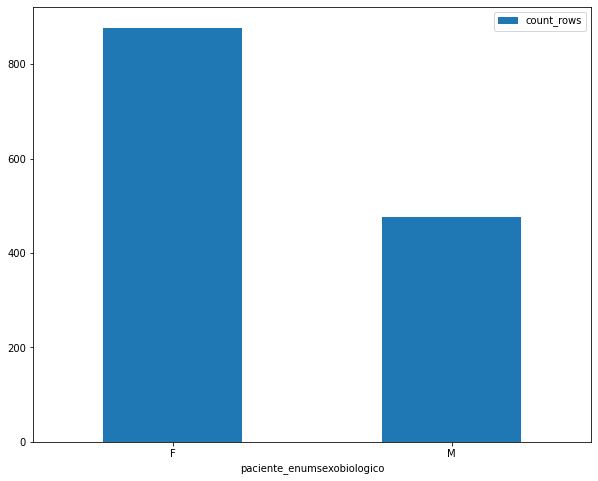

In [110]:
#plotando o sexo que recebeu a dose reforço
group_doseReforco_sexo.set_index('paciente_enumsexobiologico').plot(kind='bar', figsize=(10,8), rot=0);

#muitas mais mulheres receberam a dose reforço do que os homens 

In [111]:
#Agrupando o dataframe com apenas dados da dose de reforço
group_doseReforco_categ = doseReforco.groupby(['vacina_categoria_nome']).size().reset_index(name="count_rows")
group_doseReforco_categ

,vacina_categoria_nome,count_rows
0,Comorbidades,3
1,Faixa Etária,817
2,Pessoas de 60 anos ou mais institucionalizadas,21
3,Trabalhadores da Educação,2
4,Trabalhadores de Saúde,511


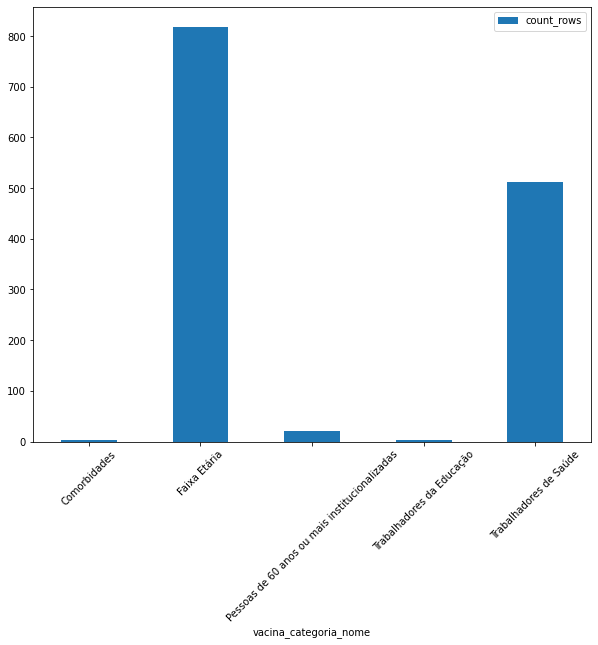

In [112]:
#plotando a categoria das pessoas que receberam a dose reforço
group_doseReforco_categ.set_index('vacina_categoria_nome').plot(kind='bar', figsize=(10,8), rot=45);

#muitas mais mulheres receberam a dose reforço do que os homens 

In [113]:
#entendendo os grupos que são representados pelo nome da categoria igual a "Faixa Etária"
categFaixaEtaria = doseReforco.query('vacina_categoria_nome == "Faixa Etária"')
categFaixaEtaria['vacina_grupoatendimento_nome'].unique()

#não tem uma faixa etária específica.

array(['Pessoas de 70 a 74 anos', 'Pessoas de 80 anos ou mais',
       'Pessoas de 75 a 79 anos', 'Pessoas de 65 a 69 anos',
       'Pessoas de 18 a 64 anos'], dtype=object)

In [114]:
#Para categoria igual a "Faix Etária", contabilizando os grupos de atendimento
categFaixaEtaria2 = categFaixaEtaria.groupby(['vacina_grupoatendimento_nome']).size().reset_index(name="count_rows")
categFaixaEtaria2

,vacina_grupoatendimento_nome,count_rows
0,Pessoas de 18 a 64 anos,13
1,Pessoas de 65 a 69 anos,74
2,Pessoas de 70 a 74 anos,349
3,Pessoas de 75 a 79 anos,222
4,Pessoas de 80 anos ou mais,159


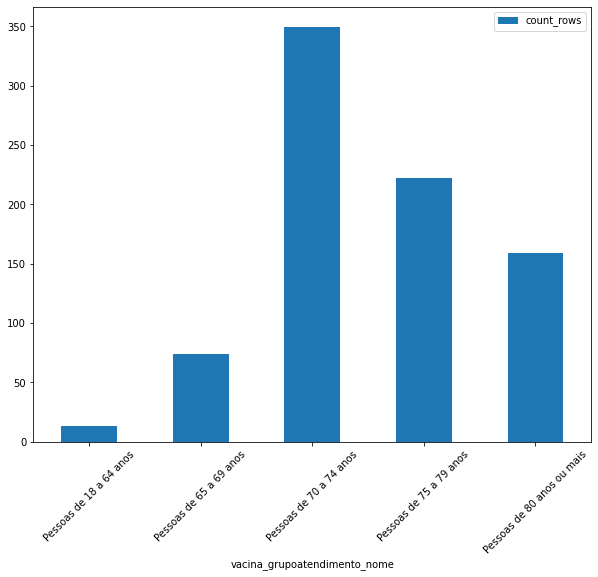

In [115]:
#plotando a categoria das pessoas que receberam a dose reforço
categFaixaEtaria2.set_index('vacina_grupoatendimento_nome').plot(kind='bar', figsize=(10,8), rot=45);

#a dose reforço foi majoritariamente aplicada e pessoas com faixa etária entre 70 e 74 anos

In [121]:
test_id = covidCampinas_df['paciente_id'][0]
test_id

'2e51f02d12646146d052b6319f70baa6c09ba401c9a5e2f689c2d5da39f85a2f'

In [123]:
filter_patitientID = covidCampinas_df.query('paciente_id == "2e51f02d12646146d052b6319f70baa6c09ba401c9a5e2f689c2d5da39f85a2f"')
filter_patitientID

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
0,ab97ebb2-d5a4-49bf-82e0-820cd766ee70-i0b0,2e51f02d12646146d052b6319f70baa6c09ba401c9a5e2...,19.0,2001-09-18,M,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,13025.0,B,2023180,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE ERNESTO SIERRA HUNOVITCH OROZI...,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,FE3591,PFIZER,NaN,2021-08-13,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,VACIVIDA,2021-08-13T03:08:00.000Z,18262,1


In [131]:
len(covidCampinas_df['paciente_id'].unique())

27329

In [129]:
#verificando se há id's dos pacientes repetidos no dataset original
diff = len(covidCampinas_df['paciente_id']) - len(covidCampinas_df['paciente_id'].unique())
diff

296

In [134]:
#decobrindo os id's duplicados

duplicatedIDS = covidCampinas_df[covidCampinas_df.duplicated(subset=['paciente_id'],keep=False)]
duplicatedIDS.head(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
11,a91bc53b-6f02-4c50-93e8-6bbe5aacfd1a-i0b0,6d8010384d5f0e447517380dd412ef9c56c0b1aa015ae9...,70.0,1950-09-14,F,2.0,PRETA,350950.0,10.0,CAMPINAS,BRASIL,SP,13063.0,B,2023466,MUNICIPIO DE CAMPINAS,DISTRITO SANITARIO NORTE,350950,CAMPINAS,SP,203,Pessoas de 70 a 74 anos,2,Faixa Etária,210061,SINOVAC/BUTANTAN,NaN,2021-03-25,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,VACIVIDA,2021-03-25T03:00:00.000Z,18262,1
36,1d5f7f4d-85ea-49d6-b69d-4a953dc00269-i0b0,86a56d9602f410eb6be7a6948ccca2e037cddd09bffa29...,69.0,1951-05-15,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13058.0,B,9635289,MUNICIPIO DE CAMPINAS,VIGILANCIA EM SAUDE NOROESTE,350950,CAMPINAS,SP,202,Pessoas de 65 a 69 anos,2,Faixa Etária,210061,SINOVAC/BUTANTAN,NaN,2021-03-25,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,VACIVIDA,2021-03-25T03:00:00.000Z,18262,1
61,e594b758-729d-4534-8584-f48e859f275d-i0b0,481c9a182fb10e22b23ac83e19ec2f9d49dcd3d1b41a23...,19.0,2002-02-11,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13031.0,B,2022826,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE BOA VISTA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,210352,SINOVAC/BUTANTAN,NaN,2021-08-13,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,VACIVIDA,2021-08-13T03:00:00.000Z,18262,1
86,684fa9a1-4c5c-4dab-a9b1-5aec9b3869e2-i0b0,02e316510b503468234e5700259bc50af623ca2428cc83...,42.0,1978-09-14,M,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,13061.0,B,6032338,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE FERNANDA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,216VCD180Z,ASTRAZENECA/FIOCRUZ,NaN,2021-07-08,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,VACIVIDA,2021-07-08T03:00:00.000Z,18262,1
156,053543a7-4795-4863-977a-44b375b20cd7-i0b0,57c2563107ba873d466f73f291088329f8cf9787702102...,32.0,1988-10-22,F,99.0,SEM INFORMACAO,350950.0,10.0,CAMPINAS,BRASIL,SP,13026.0,B,2022699,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE TAQUARAL PADRE MILTON SANTANA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,J202106033,SINOVAC/BUTANTAN,NaN,2021-07-26,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,VACIVIDA,2021-07-26T03:00:00.000Z,18262,1


In [135]:
#agrupando por ID'S
groupIDS = duplicatedIDS.groupby(['paciente_id','vacina_descricao_dose']).size().reset_index(name="count_rows")
groupIDS

,paciente_id,vacina_descricao_dose,count_rows
0,00840ac8c758323b8b094aaf1d0b49319c9e5384e04706...,1ª Dose,1
1,00840ac8c758323b8b094aaf1d0b49319c9e5384e04706...,2ª Dose,1
2,00b196a171338aa25c1a0d0a795deefb6d08d71e94c020...,2ª Dose,2
3,024a13914f12ec1caf9e4ac40c6b9b5e86e9655dee4739...,1ª Dose,1
4,024a13914f12ec1caf9e4ac40c6b9b5e86e9655dee4739...,2ª Dose,1
...,...,...,...
528,fa6cd72ae600456c525757ab0cb97c8aedf54de5c1b709...,1ª Dose,1
529,fa6cd72ae600456c525757ab0cb97c8aedf54de5c1b709...,2ª Dose,1
530,fc950bb964290a328e066ea83c068724344a4d88ee95dc...,2ª Dose,2
531,fcce1e362b0782b48c6bc1251fc8fd5478c671a69f0c3d...,1ª Dose,1


In [137]:
#agrupando por ID'S - 2
groupIDS2 = duplicatedIDS.groupby(['paciente_id'])['vacina_descricao_dose'].size().reset_index(name="count_rows")
groupIDS2

,paciente_id,count_rows
0,00840ac8c758323b8b094aaf1d0b49319c9e5384e04706...,2
1,00b196a171338aa25c1a0d0a795deefb6d08d71e94c020...,2
2,024a13914f12ec1caf9e4ac40c6b9b5e86e9655dee4739...,2
3,02e316510b503468234e5700259bc50af623ca2428cc83...,2
4,03a2c45d9c15e0435f7a8e4ddf869a6654136e858bb293...,2
...,...,...
291,f83c5bd0bb07eb1447ea95c0ddbbf2b3b444b4ca243ff2...,2
292,f852836b47b08d641a24d821a14a321208a32c19d980c1...,2
293,fa6cd72ae600456c525757ab0cb97c8aedf54de5c1b709...,2
294,fc950bb964290a328e066ea83c068724344a4d88ee95dc...,2


In [138]:
#contando a quantidade de doses que foram fornecidas ao total
groupDoseID = duplicatedIDS.groupby(['vacina_descricao_dose']).size().reset_index(name="count_rows")
groupDoseID

,vacina_descricao_dose,count_rows
0,1ª Dose,224
1,2ª Dose,313
2,Dose,2
3,Reforço,53


In [140]:
onlyDoseValues = duplicatedIDS.query('vacina_descricao_dose == "Dose"')
onlyDoseValues

#problema com a coluna "document_id", existem registros duplicados, porém com essa coluna variando

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
25291,65771a16-5d0e-46cf-a341-fb9a8d53b629-i0b0,672578165891bb8db503950d10733f5a5ca7dc1c9e7d68...,64.0,1956-11-17,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13053.0,B,6032397,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE NOVA AMERICA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1821287,JANSSEN,NaN,2021-07-16,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,VACIVIDA,2021-07-16T03:07:00.000Z,18262,8
26122,b0721be5-aea4-4d2a-b907-ee4daf931a3b-i0b0,672578165891bb8db503950d10733f5a5ca7dc1c9e7d68...,64.0,1956-11-17,F,1.0,BRANCA,350950.0,10.0,CAMPINAS,BRASIL,SP,13053.0,B,6032397,PREFEITURA MUNICIPAL DE CAMPINAS,CENTRO DE SAUDE NOVA AMERICA,350950,CAMPINAS,SP,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1821287,JANSSEN,NaN,2021-07-16,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,VACIVIDA,2021-07-16T03:07:00.000Z,18262,8
